In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Maths end sem/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.columns


Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
A = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']].values
b = df[['medv']].values

### **Z- Score normalisation**

In [ ]:
from sklearn.preprocessing import StandardScaler
A = preprocessing.scale(A)
#A = (A1 - A1.mean())/A1.std()
A

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
print(A[0:5])
print(A.shape)

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]
(506, 13)


In [ ]:
print(b[0:5])
print(b.shape)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]
(506, 1)


## **Splitting the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.10, random_state = 42)
Af_train = np.append(arr=np.ones((len(A_train),1)),values=A_train,axis=1)
Af_test = np.append(arr=np.ones((len(A_test),1)),values=A_test,axis=1)
print ('Train set:', Af_train.shape,  b_train.shape)
print ('Test set:', Af_test.shape,  b_test.shape)

Train set: (455, 14) (455, 1)
Test set: (51, 14) (51, 1)


## **Calculation of the learning_alpha** 


In [ ]:
d = np.dot(Af_train.T,Af_train)
from numpy import linalg as LA
n = LA.norm(d, 'fro')
epsilon = 10**(-8)
denom = epsilon + n 
learning_alpha = 1/denom
print(learning_alpha)

learning_alpha_new = learning_alpha + (4* 10**(-4))
print(learning_alpha_new)

0.00032305881182909113
0.0007230588118290911


# **Ridge Regression cost function**

In [ ]:
def Ridge_costfunc(A, b, theta):
 
  J_cost = np.sum(((A.dot(theta) - b) ** 2) + (epsilon * (LA.norm(theta)**2)))/2
  return J_cost

# **Batch Gradient Descent**

In [ ]:

def batch_gradient_descent(A, b, theta,learning_rate, iterations):
  cost_updated = [0] * iterations
  m = len(b)
  tol = 10**(-8)
  for iteration in range(iterations):
        theta_previous = theta

        gradient =  np.dot( np.dot(A.T , A) , theta ) - np.dot(A.T , b) + epsilon*theta
  
        theta = theta - learning_rate  * gradient

        cost_value = Ridge_costfunc(A, b, theta)
        cost_updated[iteration] = cost_value

        if LA.norm(theta - theta_previous, ord = 'fro') <= tol :
          return theta#, cost_updated

  return theta#,cost_updated
  

theta = np.zeros( (Af_train.shape[1] , 1 ) )
theta_final = batch_gradient_descent(Af_train, b_train,theta,learning_alpha,2000)

In [ ]:
theta_final

array([[22.60023822],
       [-1.03018756],
       [ 0.92995961],
       [ 0.14593865],
       [ 0.70430204],
       [-2.15151487],
       [ 2.63627473],
       [ 0.12853457],
       [-3.09369253],
       [ 2.71291743],
       [-1.98862152],
       [-2.04937974],
       [ 0.94203398],
       [-3.92438757]])

# **Predicting values**

In [ ]:
b_predicted = np.dot(Af_test + epsilon , theta_final) 

print(b_predicted.T)

[[29.36395813 36.18916488 14.05923442 24.76681247 18.79788313 23.24853436
  17.67925178 13.52689728 23.47852887 20.64157349 25.09931707 18.95745411
  -5.20884392 21.49578249 19.70582796 25.88188542 20.58810066  6.32255138
  40.53496183 17.70625566 27.18358558 30.26489802 11.44273443 23.67928118
  18.31340125 16.68382622 22.7040864  15.00807529 22.63999493 19.2659574
  23.18874642 25.13865464 25.457444   18.65562998 17.14694387 17.09774614
  30.86149948 20.30925708 23.66439625 24.16999144 14.0222965  32.76422213
  42.75995437 17.52640862 27.33820188 17.47952622 14.37833452 25.34949517
  20.51753419 30.15497531 21.71831633]]


In [ ]:
v = (np.sqrt( np.sum( (Y_predicted - b_test) **2 ) /b_test.size )) 
round(v,5)

3.87245

# **Plotting the Predicted values**

Text(0, 0.5, 'b predicted values')

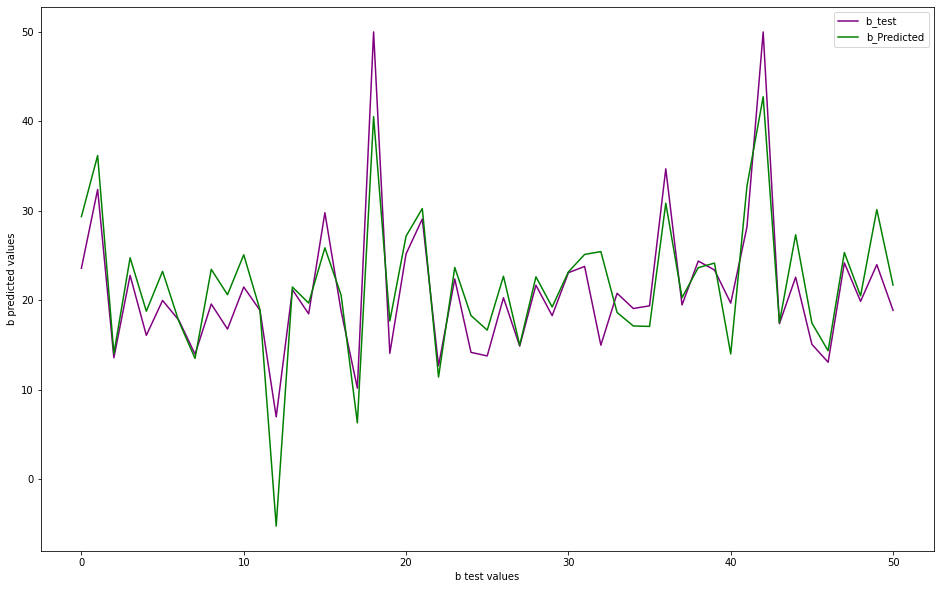

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16  ,10))
plt.plot(b_test, color = 'purple')
plt.plot(b_predicted , color = 'green')
plt.legend(["b_test " , "b_Predicted"])
plt.xlabel('b test values')
plt.ylabel('b predicted values')

In [ ]:
theta_actual = np.dot(np.dot( np.linalg.inv( np.dot(Af_train.T , Af_train) + epsilon) , Af_train.T ) , b_train ) 


**Comparing the values of theta obtained by solving the normal equation vs the values of theta obtained by gradient descent method**

In [ ]:
print("Actual values of theta using normal equation : ")
print(theta_actual)
print()
print("Theta values obtained by batch gradient descent method : ")
print(theta_final)

Actual values of theta using normal equation : 
[[22.60023822]
 [-1.03018761]
 [ 0.92995971]
 [ 0.14593891]
 [ 0.704302  ]
 [-2.15151491]
 [ 2.63627468]
 [ 0.12853461]
 [-3.09369252]
 [ 2.71291811]
 [-1.98862229]
 [-2.04937977]
 [ 0.94203399]
 [-3.92438759]]

Theta values obtained by batch gradient descent method : 
[[22.60023822]
 [-1.03018756]
 [ 0.92995961]
 [ 0.14593865]
 [ 0.70430204]
 [-2.15151487]
 [ 2.63627473]
 [ 0.12853457]
 [-3.09369253]
 [ 2.71291743]
 [-1.98862152]
 [-2.04937974]
 [ 0.94203398]
 [-3.92438757]]



**Calculating the frobenius norm of (Theta_actual - theta_final)**

In [ ]:
diff = LA.norm(theta_actual - theta_final, ord = 'fro')
diff

1.0680928080647973e-06

In [ ]:
theta_final = batch_gradient_descent(Af_train, b_train,theta,learning_alpha,2000)
theta_final 

array([[22.60023822],
       [-1.03018756],
       [ 0.92995961],
       [ 0.14593865],
       [ 0.70430204],
       [-2.15151487],
       [ 2.63627473],
       [ 0.12853457],
       [-3.09369253],
       [ 2.71291743],
       [-1.98862152],
       [-2.04937974],
       [ 0.94203398],
       [-3.92438757]])

**Using a slightly increased alpha in the gradient descent method**

In [ ]:
theta_final_new = batch_gradient_descent(Af_train, b_train,theta,learning_alpha_new,2000)
theta_final_new

array([[-1.50942806e+42],
       [ 7.70913501e+43],
       [-8.03375663e+43],
       [ 1.06831609e+44],
       [ 3.92822551e+42],
       [ 1.05570975e+44],
       [-5.70020669e+43],
       [ 9.58714579e+43],
       [-1.01558226e+44],
       [ 9.69894340e+43],
       [ 1.02253692e+44],
       [ 6.21379784e+43],
       [-6.35949404e+43],
       [ 9.41267799e+43]])